# 03 Exploratory Data Analysis

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Data Load

In [2]:
Housing_Data = pd.read_csv(r'..\Data\Clean_Housing_Data.csv', index_col = 0)

In [3]:
Housing_Data.head()

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015,Plot-Living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4470
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4672
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,9230
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3040
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6400


#### Changes in Data Type

In [4]:
Housing_Data['Transaction_Date'] = pd.to_datetime(Housing_Data['Transaction_Date'])
Housing_Data['Id'] = Housing_Data['Id'].astype('object')
Housing_Data['Zipcode'] = Housing_Data['Zipcode'].astype('object')

In [5]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21417 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                21417 non-null  object        
 1   Transaction_Date  21417 non-null  datetime64[ns]
 2   Price             21417 non-null  float64       
 3   Bedroom_Count     21417 non-null  int64         
 4   Bathroom_Count    21417 non-null  float64       
 5   Sqft_Living       21417 non-null  int64         
 6   Sqft_Plot         21417 non-null  int64         
 7   Floor_Count       21417 non-null  float64       
 8   Waterfront        21417 non-null  int64         
 9   View              21417 non-null  int64         
 10  Condition         21417 non-null  int64         
 11  Grade             21417 non-null  int64         
 12  Sqft_Above        21417 non-null  int64         
 13  Sqft_Basement     21417 non-null  int64         
 14  Year_Built        2141

In [6]:
Housing_Data.columns

Index(['Id', 'Transaction_Date', 'Price', 'Bedroom_Count', 'Bathroom_Count',
       'Sqft_Living', 'Sqft_Plot', 'Floor_Count', 'Waterfront', 'View',
       'Condition', 'Grade', 'Sqft_Above', 'Sqft_Basement', 'Year_Built',
       'Year_Renovated', 'Zipcode', 'Latitude', 'Longitude',
       'Sqft_Living_2015', 'Sqft_Plot_2015', 'Plot-Living'],
      dtype='object')

## Feature Engneering

Challenge:- How to handle date time object

In [7]:
Housing_Data['Age'] = 2020 - Housing_Data['Year_Built']

In [8]:
Housing_Data['Change_In_Sqft_Living'] = Housing_Data['Sqft_Living_2015'] - Housing_Data['Sqft_Living']

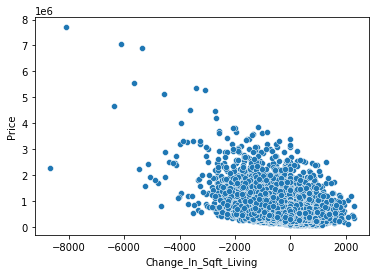

In [9]:
sns.scatterplot(x = 'Change_In_Sqft_Living', y = 'Price', data = Housing_Data);

In [10]:
Housing_Data['Change_In_Sqft_Plot'] = Housing_Data['Sqft_Plot_2015'] - Housing_Data['Sqft_Plot']

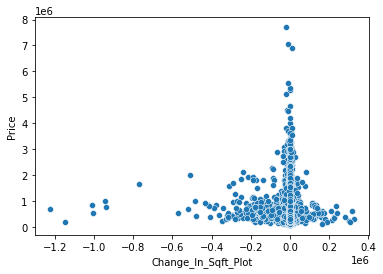

In [11]:
sns.scatterplot(x = 'Change_In_Sqft_Plot', y = 'Price', data = Housing_Data);

In [12]:
Housing_Data.columns

Index(['Id', 'Transaction_Date', 'Price', 'Bedroom_Count', 'Bathroom_Count',
       'Sqft_Living', 'Sqft_Plot', 'Floor_Count', 'Waterfront', 'View',
       'Condition', 'Grade', 'Sqft_Above', 'Sqft_Basement', 'Year_Built',
       'Year_Renovated', 'Zipcode', 'Latitude', 'Longitude',
       'Sqft_Living_2015', 'Sqft_Plot_2015', 'Plot-Living', 'Age',
       'Change_In_Sqft_Living', 'Change_In_Sqft_Plot'],
      dtype='object')

In [13]:
Housing_Data = Housing_Data.drop(['Year_Built', 'Year_Renovated'], axis = 1)

#### Plotting Corelation Matrix using HeatMap

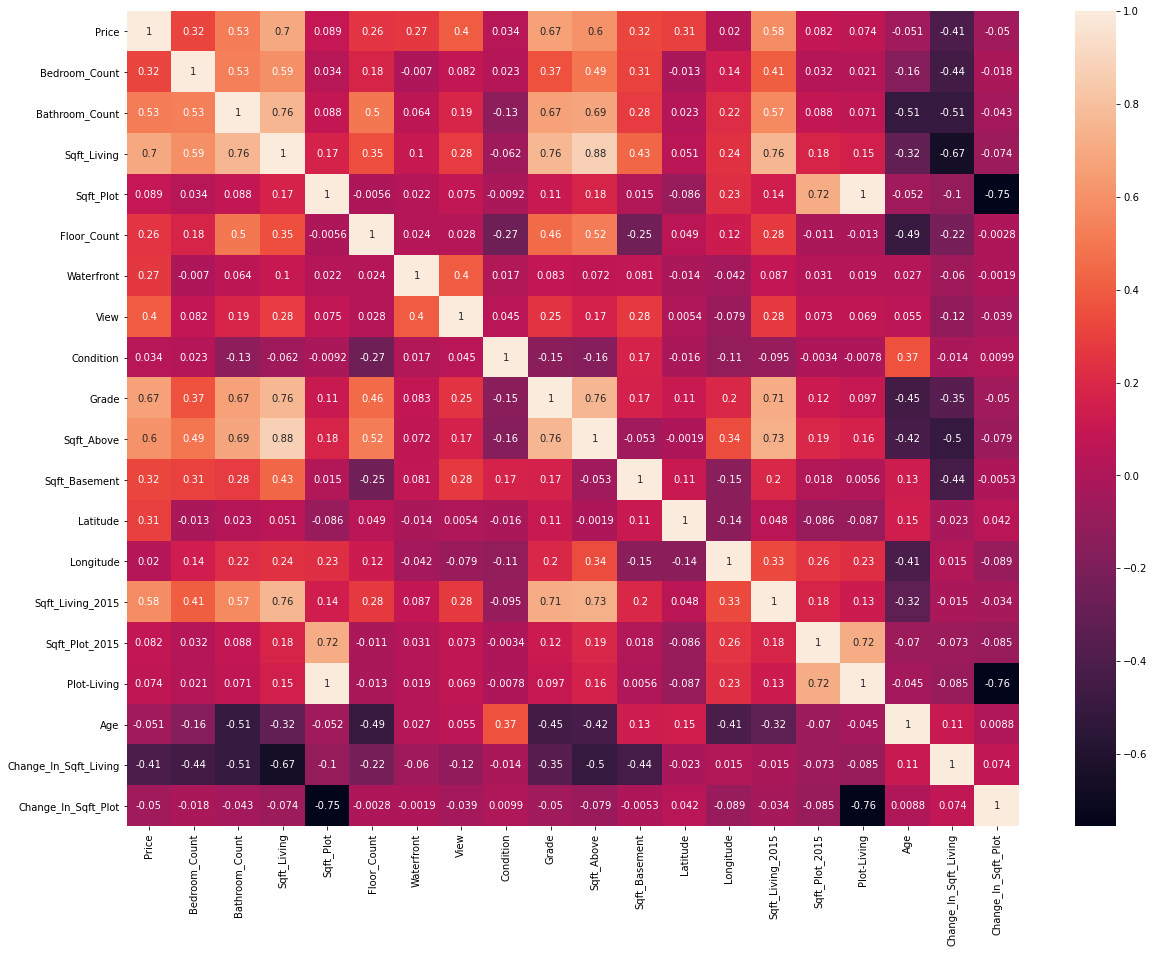

In [14]:
corr_mtrx = Housing_Data.corr()
fig = plt.figure(figsize = (20,15))
sns.heatmap(corr_mtrx, annot= True);

Price is highly positive corelated with sqft_living, grade, bedrooms, sqft_above, sqft_living15. This makes sense as the size increase price goes up.

#### Plotting feature with maximum corelation with Price`

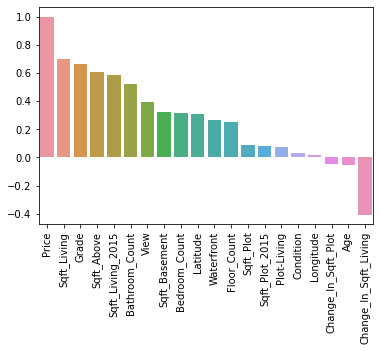

In [15]:
corr_price = Housing_Data.corr()['Price'].sort_values(ascending =False)
sns.barplot(x = corr_price.index, y = corr_price.array);
plt.xticks(rotation = 90);

### Load Zipcode wise summary


In [16]:
path = r'..\Data\Zipcode_wise_summary.csv'
Zip_code_summary = pd.read_csv(path, index_col = 0)

In [17]:
Zip_code_summary.head().T

,0,1,2,3,4
Zipcode,98001.0,98002.0,98003.0,98004.0,98005.0
Listing_per_Zip_Code,358.0,197.0,276.0,315.0,168.0
ZipCode_Total_sqft_living,683156.0,320601.0,533077.0,916880.0,446343.0
ZipCode_Total_sqft_lot,5357969.0,1479322.0,2932538.0,4121578.0,3348036.0
ZipCode_Total_sqft_above,618166.0,299665.0,459094.0,761810.0,362913.0
ZipCode_Total_sqft_basement,64990.0,20936.0,73983.0,155070.0,83430.0
ZipCode_Total_sqft_living15,655956.0,291257.0,518995.0,841880.0,431401.0
ZipCode_Total_sqft_lot15,4009721.0,1494775.0,2696954.0,4031552.0,3085786.0
Zipcode_Median_housePrice,260000.0,235000.0,269500.0,1150000.0,765475.0


In [18]:
Zip_codes = Zip_code_summary['Zipcode']
Zip_codes

0     98001
1     98002
2     98003
3     98004
4     98005
      ...  
65    98177
66    98178
67    98188
68    98198
69    98199
Name: Zipcode, Length: 70, dtype: int64

In [19]:
Zip_code_summary_df = Zip_code_summary.set_index(Zip_codes)

In [20]:
Zip_code_summary_df.head()

,Zipcode,Listing_per_Zip_Code,ZipCode_Total_sqft_living,ZipCode_Total_sqft_lot,ZipCode_Total_sqft_above,ZipCode_Total_sqft_basement,ZipCode_Total_sqft_living15,ZipCode_Total_sqft_lot15,Zipcode_Median_housePrice
Zipcode,,,,,,,,,
98001,98001,358,683156,5357969,618166,64990,655956,4009721,260000.0
98002,98002,197,320601,1479322,299665,20936,291257,1494775,235000.0
98003,98003,276,533077,2932538,459094,73983,518995,2696954,269500.0
98004,98004,315,916880,4121578,761810,155070,841880,4031552,1150000.0
98005,98005,168,446343,3348036,362913,83430,431401,3085786,765475.0


In [21]:
Zip_code_summary_df = Zip_code_summary_df.drop(['Zipcode'], axis = 1)

In [22]:
#Saving Column Names
Zip_code_summary_columns = Zip_code_summary_df.columns

### Exploration of Zipcode summary features

##### Top 5 Zipcodes with maximum listing

In [23]:
Zip_code_summary_df.Listing_per_Zip_Code.sort_values(ascending = False).head()

Zipcode
98103    599
98038    586
98115    576
98052    571
98117    548
Name: Listing_per_Zip_Code, dtype: int64

##### Top 5 Zipcodes with total sqft_living

In [24]:
Zip_code_summary_df.ZipCode_Total_sqft_living.sort_values(ascending = False).head()

Zipcode
98006    1413571
98052    1351618
98038    1260562
98074    1153529
98059    1120810
Name: ZipCode_Total_sqft_living, dtype: int64

##### Top 5 ZipCodes with total sqft_lot

In [25]:
Zip_code_summary_df.ZipCode_Total_sqft_lot.sort_values(ascending = False).head()

Zipcode
98022    17296502
98038    14896328
98053    14095676
98027    13533869
98014    11994174
Name: ZipCode_Total_sqft_lot, dtype: int64

##### Top 5 Zip Codes with total sqft_above

In [26]:
Zip_code_summary_df.ZipCode_Total_sqft_above.sort_values(ascending = False).head()

Zipcode
98038    1205812
98052    1201608
98006    1127121
98074    1064089
98059    1058140
Name: ZipCode_Total_sqft_above, dtype: int64

##### Top 5 Zip codes with total_sqft_basement

In [27]:
Zip_code_summary_df.ZipCode_Total_sqft_above.sort_values(ascending = False).head()

Zipcode
98038    1205812
98052    1201608
98006    1127121
98074    1064089
98059    1058140
Name: ZipCode_Total_sqft_above, dtype: int64

##### Top 5 Zip Codes with total_sqft_living15

In [28]:
Zip_code_summary_df.ZipCode_Total_sqft_living15.sort_values(ascending = False).head()

Zipcode
98006    1363885
98052    1333389
98038    1242359
98074    1126601
98059    1093983
Name: ZipCode_Total_sqft_living15, dtype: int64

##### Top 5 Zip Codes with total_sqft_lot15

In [29]:
Zip_code_summary_df.ZipCode_Total_sqft_lot15.sort_values(ascending = False).head()

Zipcode
98022    11996802
98038    11726968
98027    11712373
98053    11618312
98092    10604072
Name: ZipCode_Total_sqft_lot15, dtype: int64

##### Top 5 Zip Codes with highest mean price


In [31]:
Zip_code_summary_df.Zipcode_Median_housePrice.sort_values(ascending = False).head(5)

Zipcode
98039    1905000.0
98004    1150000.0
98040     993750.0
98112     917500.0
98005     765475.0
Name: Zipcode_Median_housePrice, dtype: float64

Please find the observations below:-
* 98038 looks like the most famous zipcode as it made top list for every feature but price.
* 98052 also made it to the list for almost all the feature except lot and price.
* None of the Zip codes that made it to the list of highest mean price has made it to any other features list.

### Principal Component Analysis

##### Data Scaling

In [32]:
Zip_code_summary_scaled = scale(Zip_code_summary_df)
Zip_code_summary_scaled

array([[ 3.71825104e-01,  1.46539220e-01,  1.86105135e-01,
         2.50897764e-01, -4.24994521e-01,  1.56788220e-01,
         3.29816354e-02, -9.53652705e-01],
       [-7.78454589e-01, -1.01421486e+00, -8.04046956e-01,
        -8.88903252e-01, -1.19423951e+00, -1.04531524e+00,
        -7.91903854e-01, -1.05209863e+00],
       [-2.14031634e-01, -3.33952876e-01, -4.33065823e-01,
        -3.18363957e-01, -2.67964055e-01, -2.94656101e-01,
        -3.97597172e-01, -9.16243254e-01],
       [ 6.46075462e-02,  8.94828685e-01, -1.29524293e-01,
         7.64948198e-01,  1.14792935e+00,  7.69622047e-01,
         4.01420576e-02,  2.55102211e+00],
       [-9.85647826e-01, -6.11639971e-01, -3.26996306e-01,
        -6.62561311e-01, -1.03006109e-01, -5.83379269e-01,
        -2.70062873e-01,  1.03682539e+00],
       [ 1.31491156e+00,  2.48503184e+00,  4.98217020e-01,
         2.07226544e+00,  3.44200948e+00,  2.49023005e+00,
         6.77325170e-01,  1.01599226e+00],
       [-1.19284106e+00, -1.065731

In [33]:
Zip_code_summary_scaled_df = pd.DataFrame(Zip_code_summary_scaled, columns = Zip_code_summary_columns)
Zip_code_summary_scaled_df

,Listing_per_Zip_Code,ZipCode_Total_sqft_living,ZipCode_Total_sqft_lot,ZipCode_Total_sqft_above,ZipCode_Total_sqft_basement,ZipCode_Total_sqft_living15,ZipCode_Total_sqft_lot15,Zipcode_Median_housePrice
0,0.371825,0.146539,0.186105,0.250898,-0.424995,0.156788,0.032982,-0.953653
1,-0.778455,-1.014215,-0.804047,-0.888903,-1.194240,-1.045315,-0.791904,-1.052099
2,-0.214032,-0.333953,-0.433066,-0.318364,-0.267964,-0.294656,-0.397597,-0.916243
3,0.064608,0.894829,-0.129524,0.764948,1.147929,0.769622,0.040142,2.551022
4,-0.985648,-0.611640,-0.326996,-0.662561,-0.103006,-0.583379,-0.270063,1.036825
...,...,...,...,...,...,...,...,...
65,-0.371213,-0.149531,-0.408707,-0.289742,0.598209,-0.174989,-0.307086,0.215885
66,-0.342634,-0.606079,-0.634473,-0.733572,0.273811,-0.601742,-0.594003,-0.876865
67,-1.221419,-1.260014,-0.832351,-1.239904,-0.822172,-1.276122,-0.849990,-0.933964
68,-0.221176,-0.500295,-0.440813,-0.506969,-0.254920,-0.449954,-0.425105,-0.927072


In [34]:
Zip_code_summary_scaled_df.mean()

Listing_per_Zip_Code           6.145877e-18
ZipCode_Total_sqft_living     -1.554312e-16
ZipCode_Total_sqft_lot         4.758099e-17
ZipCode_Total_sqft_above       2.973812e-17
ZipCode_Total_sqft_basement   -1.427430e-16
ZipCode_Total_sqft_living15    4.698622e-17
ZipCode_Total_sqft_lot15      -1.300547e-16
Zipcode_Median_housePrice     -4.282289e-17
dtype: float64

In [35]:
Zip_code_summary_scaled_df.std(ddof = 0)

Listing_per_Zip_Code           1.0
ZipCode_Total_sqft_living      1.0
ZipCode_Total_sqft_lot         1.0
ZipCode_Total_sqft_above       1.0
ZipCode_Total_sqft_basement    1.0
ZipCode_Total_sqft_living15    1.0
ZipCode_Total_sqft_lot15       1.0
Zipcode_Median_housePrice      1.0
dtype: float64

In [36]:
zip_code_pca = PCA().fit(Zip_code_summary_scaled)

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for zipcode summary statistics')

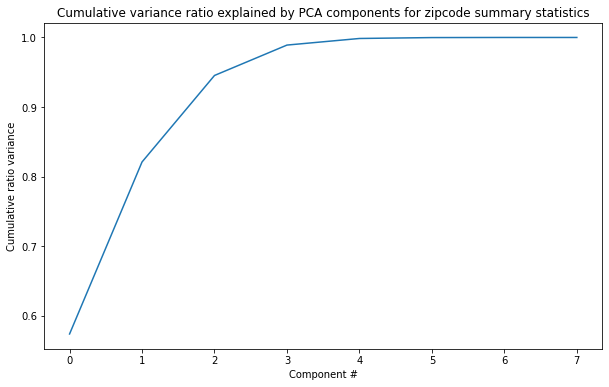

In [37]:
plt.subplots(figsize=(10, 6))
plt.plot(zip_code_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for zipcode summary statistics')

In [38]:
zip_code_pca.explained_variance_ratio_

array([5.73801037e-01, 2.47229063e-01, 1.24344495e-01, 4.36851999e-02,
       9.48616279e-03, 1.29176812e-03, 1.62274478e-04, 1.47433715e-33])

In [39]:
zip_code_pca_X = zip_code_pca.transform(Zip_code_summary_scaled)

In [40]:
zip_code_pca.explained_variance_ratio_.cumsum()

array([0.57380104, 0.8210301 , 0.94537459, 0.98905979, 0.99854596,
       0.99983773, 1.        , 1.        ])

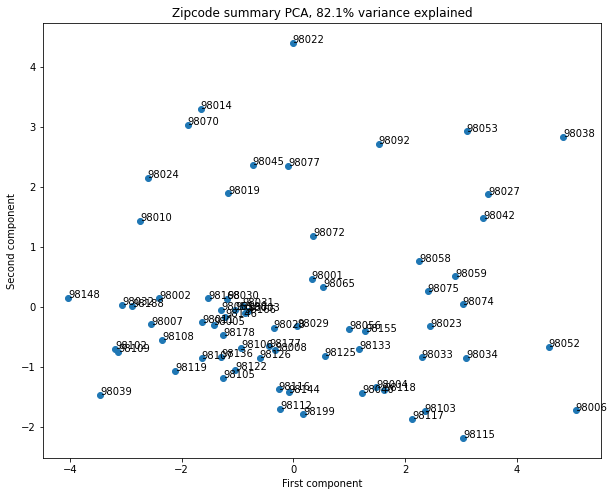

In [41]:
x = zip_code_pca_X[:, 0]
y = zip_code_pca_X[:, 1]
zipcodes = Zip_codes
pc_var = 100 * zip_code_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Zipcode summary PCA, {pc_var:.1f}% variance explained')
for z, x, y in zip(zipcodes, x, y):
    plt.annotate(z, (x, y))

In [42]:
Housing_Data[Housing_Data['Zipcode'] == 98022].sort_values('Price', ascending = False)

,Id,Transaction_Date,Price,Bedroom_Count,Bathroom_Count,Sqft_Living,Sqft_Plot,Floor_Count,Waterfront,View,...,Sqft_Basement,Zipcode,Latitude,Longitude,Sqft_Living_2015,Sqft_Plot_2015,Plot-Living,Age,Change_In_Sqft_Living,Change_In_Sqft_Plot
19156,1020069042,2014-10-01,858000.0,4,3.5,4370,422967,1.0,0,2,...,1790,98022,47.2332,-122.029,3260,422967,418597,42,-1110,0
13464,3420069060,2014-11-07,790000.0,3,2.5,2640,432036,1.5,0,3,...,0,98022,47.1795,-122.036,1500,560617,429396,24,-1140,128581
13006,619079096,2015-04-06,750000.0,3,2.5,2350,715690,1.5,0,0,...,0,98022,47.1622,-121.971,1280,325393,713340,41,-1070,-390297
11708,220069083,2014-05-09,705000.0,2,2.5,2200,188200,1.0,0,3,...,0,98022,47.2458,-122.002,2700,84942,186000,13,500,-103258
1719,1020069017,2015-03-27,700000.0,4,1.0,1300,1651359,1.0,0,3,...,0,98022,47.2313,-122.023,2560,425581,1650059,100,1260,-1225778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,3701900085,2014-08-05,169000.0,3,1.5,1570,6450,1.5,0,0,...,0,98022,47.2021,-121.996,1400,6450,4880,89,-170,0
1677,2320069248,2014-07-01,165050.0,3,1.0,1200,8514,1.0,0,0,...,0,98022,47.2043,-122.008,1210,8985,7314,61,10,471
17528,1871400585,2015-04-22,160000.0,2,1.0,1020,13647,1.0,0,0,...,0,98022,47.2848,-121.927,980,8250,12627,105,-40,-5397
2031,2420069017,2015-03-24,152900.0,1,1.0,900,4368,1.0,0,0,...,0,98022,47.2107,-121.990,1290,5000,3468,105,390,632


In [43]:
Housing_Data_New = Housing_Data.merge(Zip_code_summary, how= 'left', on = 'Zipcode')

In [44]:
Housing_Data_New['sqft_living_zipcode_ratio'] = Housing_Data_New.Sqft_Living / Housing_Data_New.ZipCode_Total_sqft_living
Housing_Data_New['sqft_lot_zipcode_ratio'] = Housing_Data_New.Sqft_Plot / Housing_Data_New.ZipCode_Total_sqft_lot
Housing_Data_New['sqft_above_zipcode_ratio'] = Housing_Data_New.Sqft_Above / Housing_Data_New.ZipCode_Total_sqft_above
Housing_Data_New['sqft_basement_zipcode_ratio'] = Housing_Data_New.Sqft_Basement / Housing_Data_New.ZipCode_Total_sqft_basement
Housing_Data_New['sqft_living15_zipcode_ratio'] = Housing_Data_New.Sqft_Living_2015 / Housing_Data_New.ZipCode_Total_sqft_living15
Housing_Data_New['sqft_lot15_zipcode_ratio'] = Housing_Data_New.Sqft_Plot_2015 / Housing_Data_New.ZipCode_Total_sqft_lot15
Housing_Data_New['sqft_median_price_zipcode_ratio'] = Housing_Data_New.Price / Housing_Data_New.Zipcode_Median_housePrice
Housing_Data_New.drop(columns=['ZipCode_Total_sqft_living', 'ZipCode_Total_sqft_lot', 'ZipCode_Total_sqft_above', 'ZipCode_Total_sqft_basement', 'ZipCode_Total_sqft_living15', 'ZipCode_Total_sqft_lot15'], inplace = True)

In [45]:
Housing_Data_New.to_csv(r'..\Data\housing_data_step3_features.csv')


**Challenges Faces during EDA**
* How to deal with date time objects, like Transaction Date, Year_Built, Year_Renovated.
* How can I caputre relationship between sqft living and sqft living 2015, same with lot.
* How to implement Principal Component Analysis?